<a href="https://colab.research.google.com/github/JVChaparroUniandes/Taller_2_Ciencia_de_Datos_Aplicada_Jairo_Chaparro_201531080/blob/main/Taller_2_Ciencia_de_Datos_Aplicada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Taller 2 Ciencia de Datos Aplicada: Apoyo del Banco Mundial a países en desarrollo**

----
Jairo Vladimir Chaparro 201531080

#**Contexto del Proyecto**
----


El Banco Mundial es una organización internacional que se dedica a brindar apoyo financiero y técnico a países en desarrollo mediante préstamos para proyectos de infraestructura, sectoriales, institucionales, entreotros, buscando mejorar el bienestar económico y social de su población. El diseño de políticas de préstamos más informadas y adaptadas a las necesidades y realidades de cada país,no solo maximiza la probabilidad de que los préstamos sean reembolsados en su totalidad, si no que también asegura que los fondos se utilicen de manera efectiva en las necesidades reales del territorio.

Históricamente, el Producto InternoBruto(PIB)ha sido uno de los indicadores clave para evaluar la capacidad de pago de un país.Sin embargo, si bien existen reportes anuales del PIB de los países,aún no se entiende a la perfección con qué otros indicadores como tasa de empleo,acceso a internet, expectativa de vida,entre otros,se encuentra relacionado.

El objetivo principal de este proyecto es desarrollar difernetes análisis que permitan dar respuesta a esta necesidad. Se ha proporcionado un dataset construido por la organización Gapminder, quienes han hecho la labor de, a partir de múltiples fuentes, integrar indicadores por país para un periodo aproximado de tiempo.

#**Diccionario de datos**
----
**country**: Identificador Único

**incomeperperson**: Producto Interno Bruto per cápita de 2010 en dólares constantes de 2000. Se ha tenido en cuenta la inflación pero no las diferencias en el costo de vida entre países.

**alcconsumption**: Consumo de alcohol por adulto (edad 15+) en 2008, litros. Consumo medio de alcohol registrado y estimado, consumo per cápita de alcohol puro en litros por adulto (15+).

**armedforcesrate**: Personal de las fuerzas armadas (% de la fuerza laboral total)

**breastcancerper100TH**: Nuevos casos de cáncer de mama en 2002 por cada 100,000 mujeres. Número de nuevos casos de cáncer de mama en 100,000 residentes femeninas durante un cierto año.

**co2emissions**: Emisión acumulativa de CO2 de 2006 (toneladas métricas), Cantidad total de emisión de CO2 en toneladas métricas desde 1751.

**femaleemployrate**: Empleadas mujeres en 2007 de 15 años o más (% de la población). Porcentaje de la población femenina, edad superior a 15, que ha estado empleada durante el año dado.

**HIVrate**: Prevalencia estimada de VIH en 2009 % - (Edades 15-49). Número estimado de personas viviendo con VIH por cada 100 personas de grupo de edad 15-49.

**Internetuserate**: Usuarios de Internet en 2010 (por cada 100 personas). Los usuarios de Internet son personas con acceso a la red mundial.

**lifeexpectancy**: Expectativa de vida al nacer en 2011 (años). El número promedio de años que un niño recién nacido viviría si los patrones de mortalidad actuales se mantuvieran igual.

**oilperperson**: Consumo de petróleo per cápita en 2010 (toneladas por año y persona).

**polityscore**: Puntuación de Democracia en 2009 (Polity). Puntuación global de polity del dataset Polity IV, calculada restando una puntuación de autocracia de una puntuación de democracia. La medida resumen de la naturaleza democrática y libre de un país. -10 es el valor más bajo, 10 el más alto.

**relectricperperson**: Consumo de electricidad residencial por persona en 2008 (kWh). La cantidad de consumo de electricidad residencial por persona durante el año dado, contada en kilovatios-hora (kWh).

**suicideper100TH**: Suicidio, ajustado por edad, por cada 100,000. Mortalidad debida a lesiones autoinfligidas, por cada 100,000 población estándar, ajustada por edad.

**employrate**: Empleados totales en 2007 de 15 años o más (% de la población). Porcentaje de la población total, edad superior a 15, que ha estado empleada durante el año dado.

**urbanrate**: Población urbana (% del total). La población urbana se refiere a las personas que viven en áreas urbanas según lo definido por las oficinas nacionales de estadísticas (calculado usando las estimaciones de población del Banco Mundial y las razones urbanas de las Perspectivas de Urbanización Mundial de las Naciones Unidas).


Para complementar la información del dataset se decidió añadir otras columnas con variables categóricas de los países que permitan enriquecer el modelo. A continuación se encuentra su descripción:

**main_religion_2008:** Religión principal del paíes en 2008

**income_groups:** El grupo al que hace parte el país según sus ingresos high, low, upper middle o lower middle

**landlocked:** Si el país tiene o no acceso al mar

**world_4region:** Región a la que pertenece el país si Europa, Asia, América o Africa


#**Configuración de librerías**
----


In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV



In [373]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#**Importación de Datos**
----

In [374]:
#Importamos el dataset principal
# Para poder utilizar el archivo sin necesidad de cargarlo a la consola, subimos el archivo a drive
#Se crea un link público y se extrae el file id
file_id = "1skeouOw9CMURWbX2MR3lZaLCJ4pAbszK"
#Creamos el link pcon el id par que python pueda leer el archivo
url = f"https://drive.google.com/uc?export=download&id={file_id}"
#Leemos el archivo completo
df_original= pd.read_csv(url)
df_banco=df_original.copy()

In [375]:
#Importamos el dataset con información categórica de los países
# Para poder utilizar el archivo sin necesidad de cargarlo a la consola, subimos el archivo a drive
#Se crea un link público y se extrae el file id
file_id = "1bGmEKD4lNCjLE_y5_WtiCfcobp1md-Wu"
#Creamos el link pcon el id par que python pueda leer el archivo
url = f"https://drive.google.com/uc?export=download&id={file_id}"
#Leemos el archivo completo
df_info_categorica= pd.read_csv(url)


#https://drive.google.com/file/d/1bGmEKD4lNCjLE_y5_WtiCfcobp1md-Wu/view?usp=sharing

#**Entendimiento Inicial de los Datos**
----


##**Aproximación Dataset df_banco**

In [376]:
#Realizamos un sample como primera aproximación al dataset
df_banco.sample(5)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
67,Malaysia,5184.709328,0.87,1.142127,30.8,2.670950e+09,43.099998,0.50,56.300034,74.221,0.890813,6.0,767.970324,8.211067,60.500000,70.36
100,Afghanistan,NaN,0.03,0.569653,26.8,7.594400e+07,25.600000,NaN,3.654122,48.673,NaN,0.0,NaN,6.684385,55.700001,24.04
12,Guatemala,1860.753895,7.10,0.660838,25.9,2.425940e+08,44.000000,0.80,10.499948,71.172,NaN,8.0,187.324882,2.234896,62.700001,48.58
54,Syria,1525.780116,1.49,5.955847,44.8,1.436893e+09,16.700001,NaN,20.663156,75.850,NaN,-7.0,815.031091,0.523528,44.799999,54.22
78,Slovak Republic,8445.526689,13.31,0.628578,48.0,5.906743e+08,45.299999,0.06,79.889777,75.446,0.677393,10.0,830.701647,10.645740,53.400002,56.56


In [377]:
#Primero miramos la dimensión del dataset df_bancos
df_banco.shape

(178, 16)

In [378]:
# Eliminamos duplicados en el dataset df_bancos
df_banco=df_banco.drop_duplicates()

In [379]:
#Si bien eliminar filas es lo último que se recomineda para manejar valores nulos, en este caso eliminamos los valores nulos en la variable objetivo
#Los valores nulos en la variable objetivo no pueden entrar al modelo, ni tampoco imputarlos porque estariamos sesgando el resultado

df_banco.dropna(subset=['incomeperperson'], inplace=True)

In [380]:
#Revisamos la composición del dataset
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 177
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               163 non-null    object 
 1   incomeperperson       163 non-null    float64
 2   alcconsumption        163 non-null    float64
 3   armedforcesrate       159 non-null    float64
 4   breastcancerper100th  162 non-null    float64
 5   co2emissions          161 non-null    float64
 6   femaleemployrate      162 non-null    float64
 7   hivrate               143 non-null    float64
 8   internetuserate       161 non-null    float64
 9   lifeexpectancy        163 non-null    float64
 10  oilperperson          60 non-null     float64
 11  polityscore           153 non-null    float64
 12  relectricperperson    128 non-null    float64
 13  suicideper100th       163 non-null    float64
 14  employrate            162 non-null    float64
 15  urbanrate             1

##**Aproximación Dataset df_info_categorica**

In [381]:
#Realizamos un sample como primera aproximación al dataset
df_info_categorica.sample(5)

,country,g77_and_oecd_countries,income_3groups,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,un_sdg_ldc,un_sdg_region,un_state,unhcr_region,unicef_region,unicode_region_subtag,west_and_rest,world_4region,world_6region
169,nam,g77,middle_income,upper_middle_income,True,NaN,NAM,516.0,NaN,coastline,-22.00,17.00000,christian,Namibia,un_not_least_developed,un_sub_saharan_africa,True,unhcr_southern_africa,ssa,NaN,rest,africa,sub_saharan_africa
67,dom,g77,middle_income,upper_middle_income,True,DO,DOM,214.0,NaN,coastline,19.00,-70.66667,christian,Dominican Republic,un_not_least_developed,un_latin_america_and_the_caribbean,True,unhcr_americas,lac,DO,rest,americas,america
199,pyf,others,high_income,high_income,True,PF,PYF,258.0,NaN,coastline,-15.00,-140.00000,christian,French Polynesia,un_not_least_developed,un_oceania_exc_australia_and_new_zealand,False,unhcr_asia_pacific,NaN,PF,NaN,asia,east_asia_pacific
177,nld,oecd,high_income,high_income,True,NL,NLD,528.0,NaN,coastline,52.25,5.75000,christian,Netherlands,un_not_least_developed,un_europe_and_northern_america,True,unhcr_europe,eca,NL,west,europe,europe_central_asia
159,mng,g77,middle_income,lower_middle_income,True,MN,MNG,496.0,NaN,landlocked,46.00,105.00000,NaN,Mongolia,un_not_least_developed,un_eastern_and_south_eastern_asia,True,unhcr_asia_pacific,eap,MN,rest,asia,east_asia_pacific


In [382]:
#Primero miramos la dimensión del dataset df_categorical_shape
df_info_categorica.shape

(273, 23)

In [383]:
# Eliminamos duplicados en el dataset df_categorical_shape
df_info_categorica=df_info_categorica.drop_duplicates()

In [384]:
#Este dataset contiene una columna llamada 'country' que no contiene el nombre páis sino el código del país
# Renombramos esa columna a country_code
df_info_categorica.rename(columns={'country': 'country_code'}, inplace=True)

In [385]:
#Este dataset contiene una columna llamada 'name' que contiene el nombre páis
# Renombramos esa columna a country
df_info_categorica.rename(columns={'name': 'country'}, inplace=True)

In [386]:
df_info_categorica.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 272
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_code            273 non-null    object 
 1   g77_and_oecd_countries  259 non-null    object 
 2   income_3groups          218 non-null    object 
 3   income_groups           218 non-null    object 
 4   is--country             273 non-null    bool   
 5   iso3166_1_alpha2        248 non-null    object 
 6   iso3166_1_alpha3        247 non-null    object 
 7   iso3166_1_numeric       247 non-null    float64
 8   iso3166_2               1 non-null      object 
 9   landlocked              255 non-null    object 
 10  latitude                241 non-null    float64
 11  longitude               241 non-null    float64
 12  main_religion_2008      216 non-null    object 
 13  country                 273 non-null    object 
 14  un_sdg_ldc              249 non-null    ob

##**Proceso de unión de los datasets**
----
En este punto para añadir las variables categóricas a nuestro dataset sin perder información del dataset original haremos los siguientes pasos:
1. Se hace un join left para agregar las columnas nuevas y mantener el dataframe original
2. Hay que revisar qué países quedaron sin información en las columnas nuevas
3. Revisamos cómo están rotulados los países faltantes en el dataset df_info_categorica
4. copiamos y pegamos manualmente la información de los países faltantes

In [387]:
# Realizamo el join left para las columnas: 'country','main_religion_2008','income_groups','landlocked','world_4region, usando 'country' como la columna a fusionar
df_banco_unificado=pd.merge(df_banco,df_info_categorica[['country','main_religion_2008','income_groups','landlocked','world_4region']],on='country',how='left')

In [388]:
#Verificamos el resultado de la unión y vemos que en las columnas nuevas hay países faltantes
df_banco_unificado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 162
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               163 non-null    object 
 1   incomeperperson       163 non-null    float64
 2   alcconsumption        163 non-null    float64
 3   armedforcesrate       159 non-null    float64
 4   breastcancerper100th  162 non-null    float64
 5   co2emissions          161 non-null    float64
 6   femaleemployrate      162 non-null    float64
 7   hivrate               143 non-null    float64
 8   internetuserate       161 non-null    float64
 9   lifeexpectancy        163 non-null    float64
 10  oilperperson          60 non-null     float64
 11  polityscore           153 non-null    float64
 12  relectricperperson    128 non-null    float64
 13  suicideper100th       163 non-null    float64
 14  employrate            162 non-null    float64
 15  urbanrate             1

In [389]:
#Traemos la lista de los países en df_info_categorica
df_info_categorica['country'].unique

<bound method Series.unique of 0                                          Abkhazia
1                                             Aruba
2                                       Afghanistan
3                                            Angola
4                                          Anguilla
5                             Akrotiri and Dhekelia
6                                             Åland
7                                           Albania
8                                           Andorra
9                              Netherlands Antilles
10                                              UAE
11                                        Argentina
12                                          Armenia
13                                   American Samoa
14                                       Antarctica
15                              Antigua and Barbuda
16                                        Australia
17                                          Austria
18                               

In [390]:
#Generamos un dataframe para mirar qué países faltan
result = df_banco_unificado[(df_banco_unificado['income_groups'].isna()) & (df_banco_unificado['landlocked'].isna()) & (df_banco_unificado['world_4region'].isna())& (df_banco_unificado['main_religion_2008'].isna())]
result

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,main_religion_2008,income_groups,landlocked,world_4region
2,Central African Rep.,239.518749,3.17,0.148659,16.5,8.338000e+06,62.900002,4.70,2.300027,48.398,NaN,-1.0,NaN,13.548420,71.300003,38.58,NaN,NaN,NaN,NaN
18,"Macedonia, FYR",2221.185664,8.94,2.101467,52.1,1.688830e+08,26.799999,NaN,51.914184,74.847,NaN,9.0,NaN,7.876878,34.900002,66.90,NaN,NaN,NaN,NaN
23,"Korea, Rep.",16372.499780,19.15,2.833966,20.4,9.666892e+09,48.000000,0.06,82.515928,80.642,2.087848,8.0,1142.309009,22.404560,58.900002,81.46,NaN,NaN,NaN,NaN
44,"Yemen, Rep.",610.357367,0.20,2.316235,35.1,2.348647e+08,20.299999,NaN,12.349750,65.493,NaN,-2.0,130.057831,6.265789,39.000000,30.64,NaN,NaN,NaN,NaN
54,Swaziland,1810.230533,5.05,NaN,12.3,2.270400e+07,47.099998,25.90,9.007736,48.718,NaN,-9.0,NaN,12.872222,50.900002,24.94,NaN,NaN,NaN,NaN
69,Kyrgyzstan,372.728414,4.72,0.837768,23.0,8.797067e+07,48.799999,0.30,19.582316,67.714,NaN,1.0,428.312307,9.875281,58.900002,36.28,NaN,NaN,NaN,NaN
107,Dominican Rep.,4049.169629,6.28,1.469369,36.1,4.463653e+08,40.500000,0.90,39.531274,73.396,NaN,8.0,457.644842,6.519537,52.700001,69.02,NaN,NaN,NaN,NaN
132,United Kingdom,28033.489280,13.24,0.508018,87.2,7.252425e+10,53.099998,0.20,84.731705,80.170,1.188028,10.0,1933.945615,6.014659,59.299999,89.94,NaN,NaN,NaN,NaN
143,Czech Rep.,7381.312751,16.47,0.515706,58.4,1.776016e+09,47.599998,0.06,68.638133,77.685,0.876778,8.0,1438.780412,12.367980,56.000000,73.50,NaN,NaN,NaN,NaN
145,United Arab Emirates,21087.394120,0.52,1.812476,24.1,2.315698e+09,37.299999,NaN,77.996781,76.546,4.299964,-8.0,11154.755030,1.392951,75.199997,77.88,NaN,NaN,NaN,NaN


In [391]:
#Arreglamos la informacion de la Republica de África Central
value_to_copy=df_info_categorica.loc[df_info_categorica['country']=='Central African Republic',['income_groups','landlocked','world_4region','main_religion_2008']]
df_banco_unificado.loc[df_banco_unificado['country']=='Central African Rep.',['income_groups','landlocked','world_4region','main_religion_2008']]=value_to_copy.values

In [392]:
#Arreglamos la informacion de Macedonia
value_to_copy=df_info_categorica.loc[df_info_categorica['country']=='North Macedonia',['income_groups','landlocked','world_4region','main_religion_2008']]
df_banco_unificado.loc[df_banco_unificado['country']=='Macedonia, FYR',['income_groups','landlocked','world_4region','main_religion_2008']]=value_to_copy.values

In [393]:
#Arreglamos la informacion de Korea del Sur
value_to_copy=df_info_categorica.loc[df_info_categorica['country']=='South Korea',['income_groups','landlocked','world_4region','main_religion_2008']]
df_banco_unificado.loc[df_banco_unificado['country']=='Korea, Rep.',['income_groups','landlocked','world_4region','main_religion_2008']]=value_to_copy.values

In [394]:
#Arreglamos la informacion de Yemen
value_to_copy=df_info_categorica.loc[df_info_categorica['country']=='Yemen',['income_groups','landlocked','world_4region','main_religion_2008']]
df_banco_unificado.loc[df_banco_unificado['country']=='Yemen, Rep.',['income_groups','landlocked','world_4region','main_religion_2008']]=value_to_copy.values

In [395]:
#Arreglamos la informacion de Suazilandia
value_to_copy=df_info_categorica.loc[df_info_categorica['country']=='Eswatini',['income_groups','landlocked','world_4region','main_religion_2008']]
df_banco_unificado.loc[df_banco_unificado['country']=='Swaziland',['income_groups','landlocked','world_4region','main_religion_2008']]=value_to_copy.values

In [396]:
#Arreglamos la informacion de Kirguistán
value_to_copy=df_info_categorica.loc[df_info_categorica['country']=='Kyrgyz Republic',['income_groups','landlocked','world_4region','main_religion_2008']]
df_banco_unificado.loc[df_banco_unificado['country']=='Kyrgyzstan',['income_groups','landlocked','world_4region','main_religion_2008']]=value_to_copy.values

In [397]:
#Arreglamos la informacion de República Dominicana
value_to_copy=df_info_categorica.loc[df_info_categorica['country']=='Dominican Republic',['income_groups','landlocked','world_4region','main_religion_2008']]
df_banco_unificado.loc[df_banco_unificado['country']=='Dominican Rep.',['income_groups','landlocked','world_4region','main_religion_2008']]=value_to_copy.values

In [398]:
#Arreglamos la informacion del Reino Unido
value_to_copy=df_info_categorica.loc[df_info_categorica['country']=='UK',['income_groups','landlocked','world_4region','main_religion_2008']]
df_banco_unificado.loc[df_banco_unificado['country']=='United Kingdom',['income_groups','landlocked','world_4region','main_religion_2008']]=value_to_copy.values

In [399]:
#Arreglamos la informacion de República Checa
value_to_copy=df_info_categorica.loc[df_info_categorica['country']=='Czech Republic',['income_groups','landlocked','world_4region','main_religion_2008']]
df_banco_unificado.loc[df_banco_unificado['country']=='Czech Rep.',['income_groups','landlocked','world_4region','main_religion_2008']]=value_to_copy.values

In [400]:
#Arreglamos la informacion de los Emiratos Árabes Unidos
value_to_copy=df_info_categorica.loc[df_info_categorica['country']=='UAE',['income_groups','landlocked','world_4region','main_religion_2008']]
df_banco_unificado.loc[df_banco_unificado['country']=='United Arab Emirates',['income_groups','landlocked','world_4region','main_religion_2008']]=value_to_copy.values

In [401]:
#Arreglamos la informacion de Laos
value_to_copy=df_info_categorica.loc[df_info_categorica['country']=='Lao',['income_groups','landlocked','world_4region','main_religion_2008']]
df_banco_unificado.loc[df_banco_unificado['country']=='Laos',['income_groups','landlocked','world_4region','main_religion_2008']]=value_to_copy.values

In [402]:
#Arreglamos la informacion de los Estados Unidos
value_to_copy=df_info_categorica.loc[df_info_categorica['country']=='USA',['income_groups','landlocked','world_4region','main_religion_2008']]
df_banco_unificado.loc[df_banco_unificado['country']=='United States',['income_groups','landlocked','world_4region','main_religion_2008']]=value_to_copy.values

In [403]:
#Generamos el dataframe anterior para mirar si los países faltantes se arreglaron
result = df_banco_unificado[(df_banco_unificado['income_groups'].isna()) & (df_banco_unificado['landlocked'].isna()) & (df_banco_unificado['world_4region'].isna())& (df_banco_unificado['main_religion_2008'].isna())]
result

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,main_religion_2008,income_groups,landlocked,world_4region


In [404]:
#Observamos nuevamente la composición del dataset final
df_banco_unificado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 162
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               163 non-null    object 
 1   incomeperperson       163 non-null    float64
 2   alcconsumption        163 non-null    float64
 3   armedforcesrate       159 non-null    float64
 4   breastcancerper100th  162 non-null    float64
 5   co2emissions          161 non-null    float64
 6   femaleemployrate      162 non-null    float64
 7   hivrate               143 non-null    float64
 8   internetuserate       161 non-null    float64
 9   lifeexpectancy        163 non-null    float64
 10  oilperperson          60 non-null     float64
 11  polityscore           153 non-null    float64
 12  relectricperperson    128 non-null    float64
 13  suicideper100th       163 non-null    float64
 14  employrate            162 non-null    float64
 15  urbanrate             1

##**Análisis de Covarianza**
Para encontrar las variables más relevantes del dataset, analizaremos la correlación que hay entre la columna incomeperperson y las demás variables del dataset.

In [405]:
#Calculamos la correlación de las variables
correlacion=df_banco_unificado.corr()

<ipython-input-405-e8250606c3fd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion=df_banco_unificado.corr()


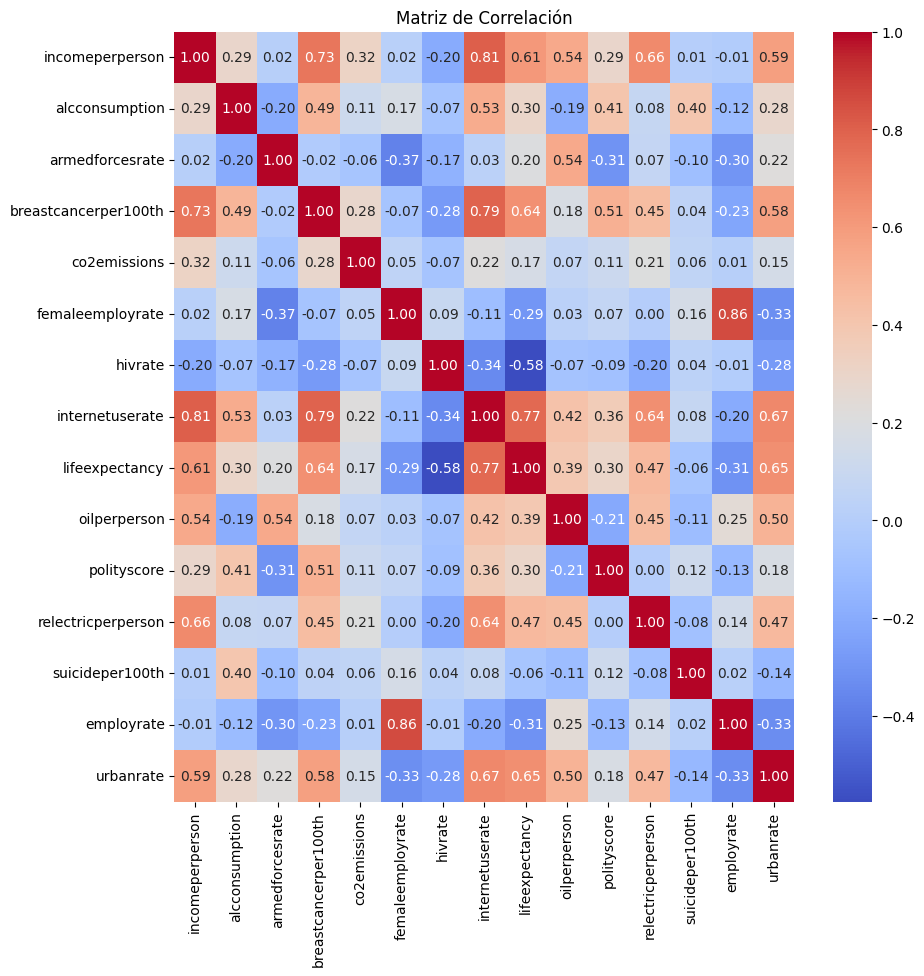

In [406]:
#Mapa de calor para mirar la correlacion
plt.figure(figsize=(10,10))
sns.heatmap(correlacion, annot=True, fmt=".2f",cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [407]:
#Miramos las correlaciones que tienen todas las variables con la variable objetivo
correlaciones_pib=correlacion['incomeperperson']
correlaciones_pib=correlaciones_pib.drop(labels='incomeperperson',axis=0)
correlaciones_pib=correlaciones_pib.sort_values(ascending=False)
correlaciones_pib

internetuserate         0.808128
breastcancerper100th    0.730466
relectricperperson      0.664379
lifeexpectancy          0.606281
urbanrate               0.585350
oilperperson            0.542281
co2emissions            0.316875
alcconsumption          0.291129
polityscore             0.287579
femaleemployrate        0.019218
armedforcesrate         0.015255
suicideper100th         0.005159
employrate             -0.011747
hivrate                -0.201640
Name: incomeperperson, dtype: float64

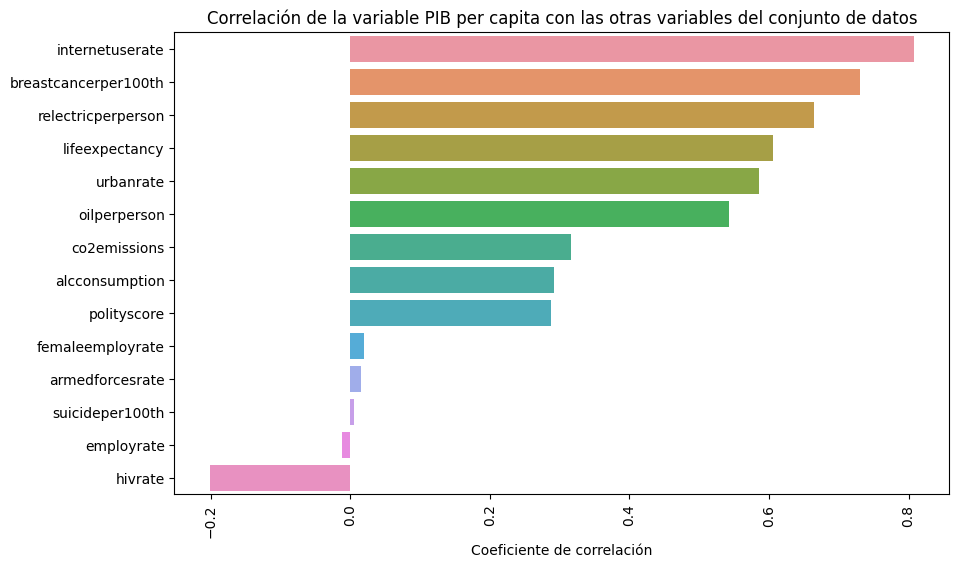

In [408]:
plt.figure(figsize=(10,6))
sns.barplot(y=correlaciones_pib.index, x=correlaciones_pib.values)
plt.title('Correlación de la variable PIB per capita con las otras variables del conjunto de datos')
plt.xlabel('Coeficiente de correlación')
plt.xticks(rotation=90)
plt.show()

##**Análisis Univariable**

Para el análisis univariable, miraremos la distribución de la variable incomeperperson, además utilizaremos las primeras 5 variables con mayor correlación que en este caso son "internetuserate", "breastcancerper100th", "relectricperperson", "lifeexpectancy" y "urbanrate". Tambíen analizaremos la cantidad de países por región que hay y cuantos países hay por cada grupo de ingresos.

###**Incomeperperson**

In [409]:
#Revisaos valores nulos en esta columna
df_banco_unificado['incomeperperson'].isna().sum()

0

In [410]:
#Miramos como están distribuidos los valores de está columna
df_banco_unificado['incomeperperson'].describe()

count      163.000000
mean      7202.019107
std      10469.295971
min        103.775857
25%        602.502870
50%       2344.896916
75%       8550.031767
max      52301.587180
Name: incomeperperson, dtype: float64

[]

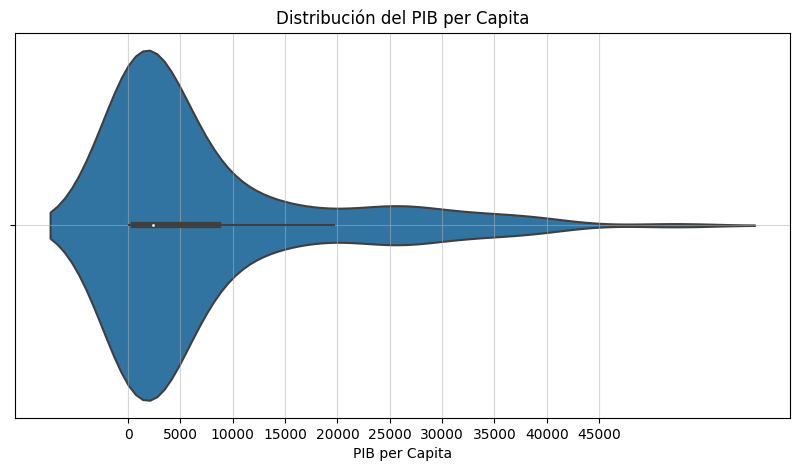

In [411]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='incomeperperson', data=df_banco_unificado)
plt.title("Distribución del PIB per Capita")
plt.xlabel("PIB per Capita")
plt.grid(True,alpha=0.5)
plt.xticks(ticks=np.arange(0, 50000, step=5000))
plt.plot()

###**internetuserate**

In [412]:
#Revisaos valores nulos en esta columna
df_banco_unificado['internetuserate'].isna().sum()

2

In [413]:
#Miramos como están distribuidos los valores de está columna
df_banco_unificado['internetuserate'].describe()

count    161.000000
mean      33.809838
std       28.004156
min        0.210066
25%        9.196775
50%       28.731883
75%       53.024745
max       95.638113
Name: internetuserate, dtype: float64

[]

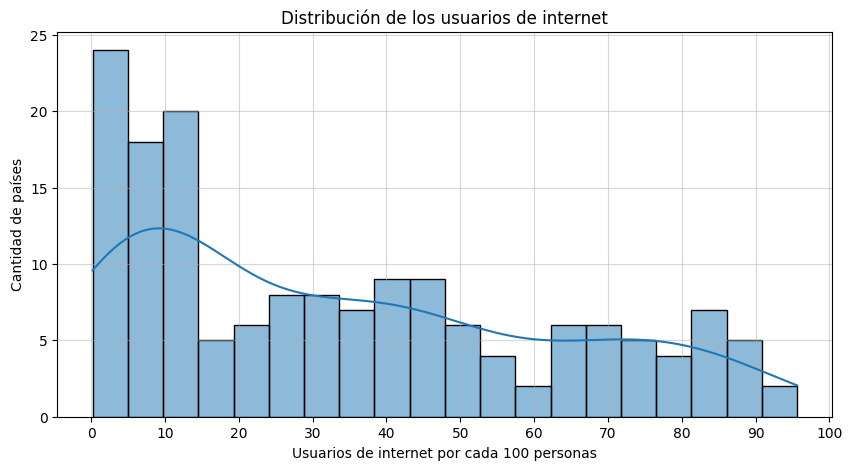

In [415]:
plt.figure(figsize=(10, 5))
sns.histplot(df_banco_unificado['internetuserate'], kde=True,bins=20)
plt.title("Distribución de los usuarios de internet")
plt.xlabel("Usuarios de internet por cada 100 personas")
plt.ylabel("Cantidad de países")
plt.grid(True,alpha=0.5)
plt.xticks(ticks=np.arange(0, 200+10, step=10))
plt.plot()

###**breastcancerper100th**

In [416]:
df_banco_unificado['breastcancerper100th'].isna().sum()

1

In [417]:
df_banco_unificado['breastcancerper100th'].describe()

count    162.000000
mean      37.656790
std       23.189042
min        3.900000
25%       20.600000
50%       29.900000
75%       50.250000
max      101.100000
Name: breastcancerper100th, dtype: float64

[]

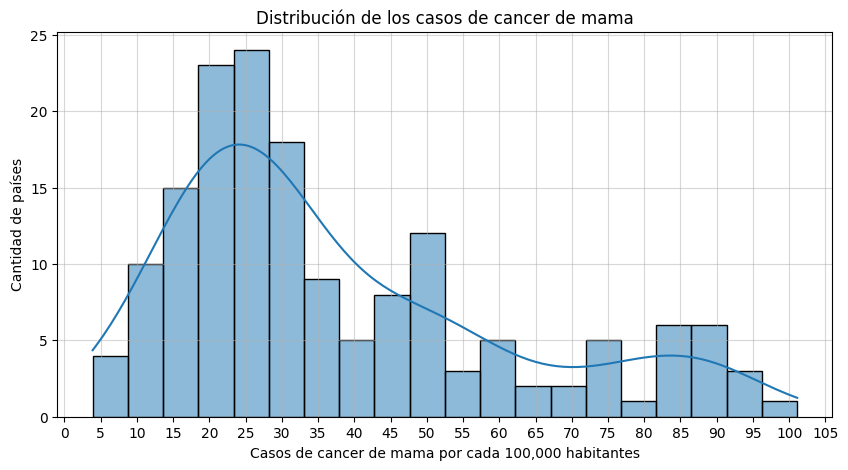

In [418]:
plt.figure(figsize=(10, 5))
sns.histplot(df_banco_unificado['breastcancerper100th'], kde=True,bins=20)
plt.title("Distribución de los casos de cancer de mama")
plt.xlabel("Casos de cancer de mama por cada 100,000 habitantes")
plt.ylabel("Cantidad de países")
plt.grid(True,alpha=0.5)
plt.xticks(ticks=np.arange(0, 200+10, step=5))
plt.plot()

###**relectricperperson**

In [419]:
df_banco_unificado['relectricperperson'].isna().sum()

35

In [420]:
df_banco['relectricperperson'].describe()

count      128.000000
mean      1144.245457
std       1596.990968
min          0.000000
25%        219.736499
50%        597.136436
75%       1491.145249
max      11154.755030
Name: relectricperperson, dtype: float64

[]

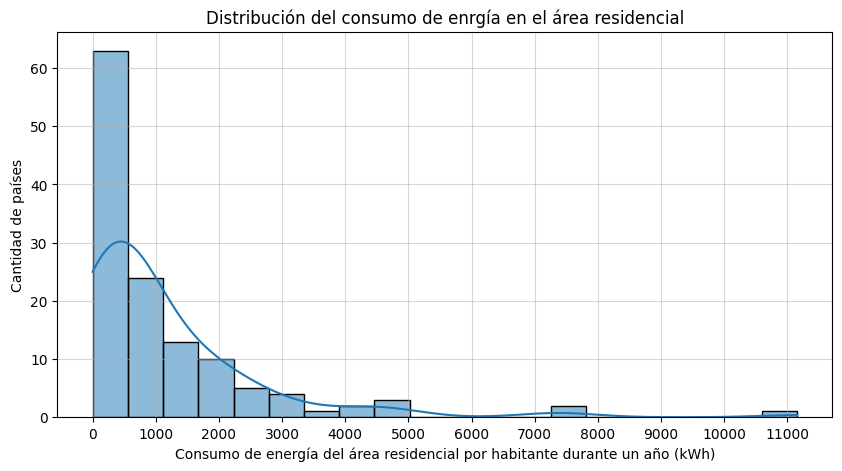

In [421]:
plt.figure(figsize=(10, 5))
sns.histplot(df_banco_unificado['relectricperperson'], kde=True,bins=20)
plt.title("Distribución del consumo de enrgía en el área residencial")
plt.xlabel("Consumo de energía del área residencial por habitante durante un año (kWh)")
plt.ylabel("Cantidad de países")
plt.grid(True,alpha=0.5)
plt.xticks(ticks=np.arange(0, 20000+10, step=1000))
plt.plot()

###**lifeexpectancy**

In [422]:
df_banco_unificado['lifeexpectancy'].isna().sum()

0

In [423]:
df_banco_unificado['lifeexpectancy'].describe()

count    163.000000
mean      69.219650
std        9.924945
min       47.794000
25%       62.470000
50%       72.974000
75%       76.337000
max       83.394000
Name: lifeexpectancy, dtype: float64

[]

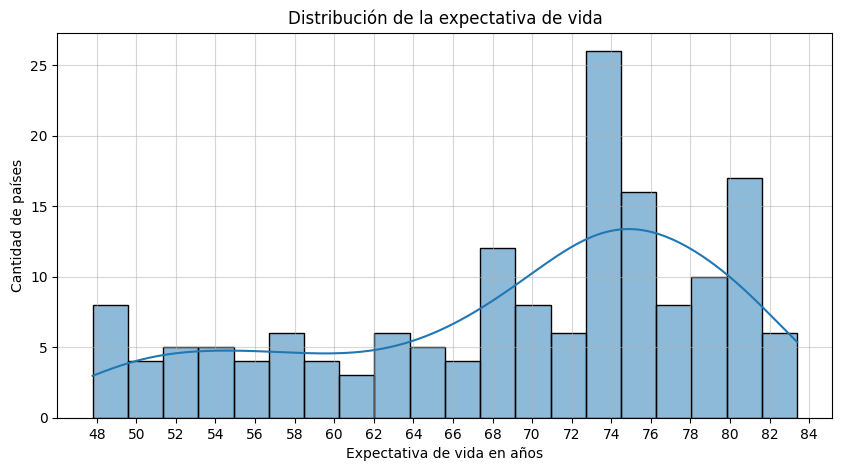

In [424]:
plt.figure(figsize=(10, 5))
sns.histplot(df_banco_unificado['lifeexpectancy'], kde=True,bins=20)
plt.title("Distribución de la expectativa de vida")
plt.xlabel("Expectativa de vida en años")
plt.ylabel("Cantidad de países")
plt.grid(True,alpha=0.5)
plt.xticks(ticks=np.arange(0, 100, step=2))
plt.plot()

###**urbanrate**

In [425]:
df_banco_unificado['urbanrate'].isna().sum()

0

In [426]:
df_banco_unificado['urbanrate'].describe()

count    163.000000
mean      56.015215
std       22.600016
min       10.400000
25%       37.090000
50%       57.940000
75%       73.470000
max      100.000000
Name: urbanrate, dtype: float64

[]

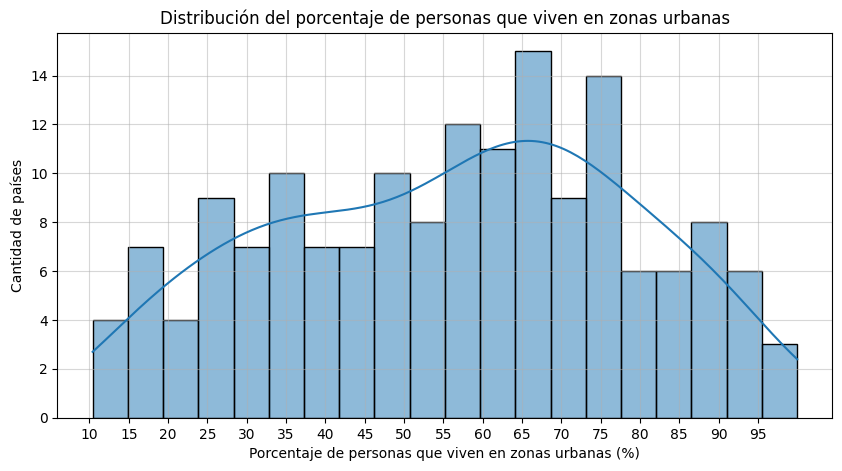

In [427]:
plt.figure(figsize=(10, 5))
sns.histplot(df_banco_unificado['urbanrate'], kde=True,bins=20)
plt.title("Distribución del porcentaje de personas que viven en zonas urbanas")
plt.ylabel("Cantidad de países")
plt.xlabel("Porcentaje de personas que viven en zonas urbanas (%)")
plt.xticks(ticks=np.arange(0, 100, step=5))
plt.grid(True,alpha=0.5)
plt.plot()

##**Análisis Bivariable**

###**Análisis por regiones**

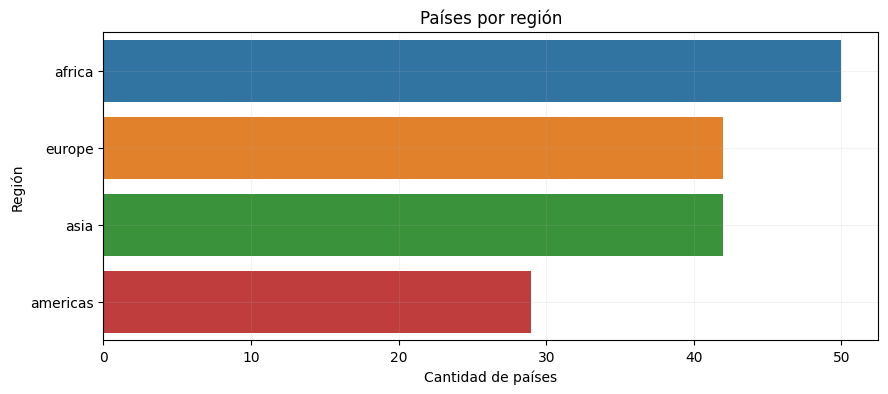

In [429]:
plt.figure(figsize=(10,4))
sns.countplot(y='world_4region', data=df_banco_unificado, order=df_banco_unificado['world_4region'].value_counts().index)
plt.title('Países por región')
plt.xlabel('Cantidad de países')
plt.ylabel('Región')
plt.xticks(rotation=0)
plt.grid(True,alpha=0.15)
plt.show()


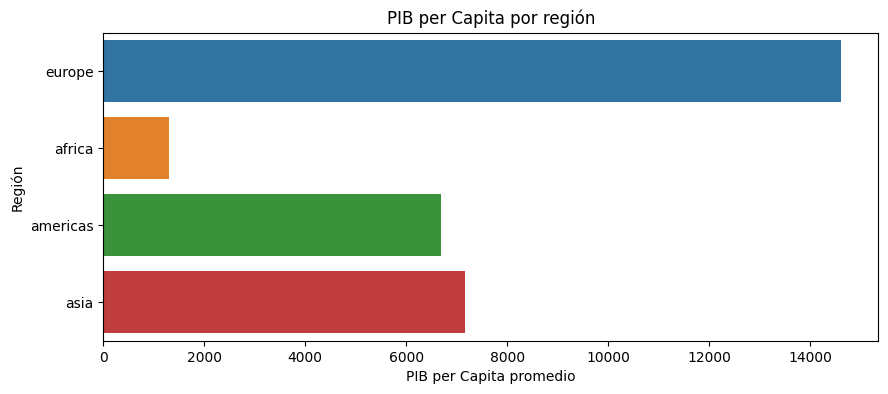

In [430]:
plt.figure(figsize=(10,4))
sns.barplot(y='world_4region', x='incomeperperson',data=df_banco_unificado,errorbar=None)
plt.title('PIB per Capita por región')
plt.xlabel('PIB per Capita promedio')
plt.ylabel('Región')
plt.xticks(rotation=0)
plt.show()

###**Incomeperperson vs Internetuserate**

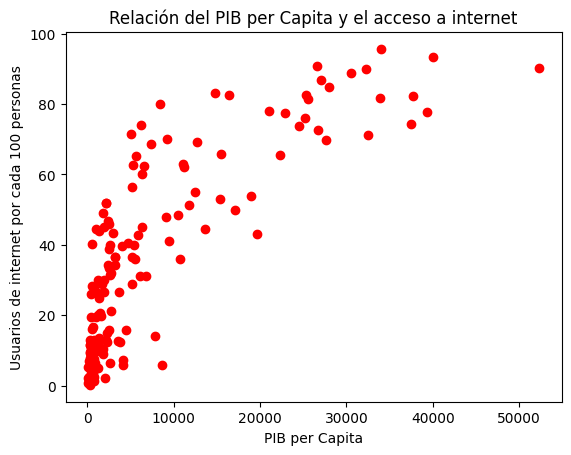

In [431]:
# Datos de ejemplo
x1, y1 = df_banco_unificado['incomeperperson'].to_numpy(), df_banco_unificado['internetuserate'].to_numpy()

# Scatter plots
plt.scatter(x1, y1, color='red', label='Valores de referencia (y_test)')
plt.xlabel('PIB per Capita')
plt.ylabel('Usuarios de internet por cada 100 personas')
plt.title("Relación del PIB per Capita y el acceso a internet")
plt.show()

###**Incomeperperson vs Breastcancerper100th**

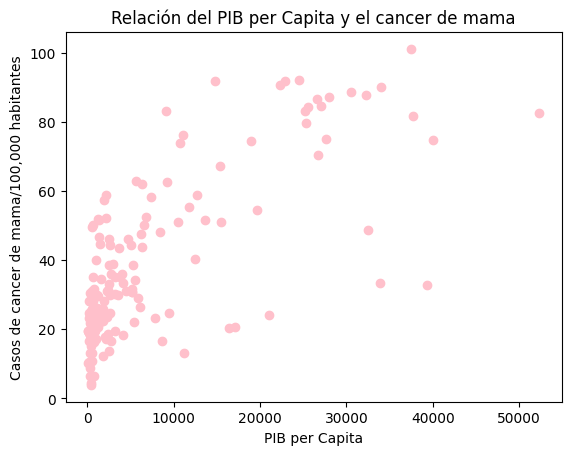

In [432]:
# Datos de ejemplo
x1, y1 = df_banco_unificado['incomeperperson'].to_numpy(), df_banco_unificado['breastcancerper100th'].to_numpy()

# Scatter plots
plt.scatter(x1, y1, color='pink', label='Valores de referencia (y_test)')
plt.xlabel('PIB per Capita')
plt.ylabel('Casos de cancer de mama/100,000 habitantes')
plt.title("Relación del PIB per Capita y el cancer de mama")
plt.show()

###**Incomeperperson vs Relectricperperson**

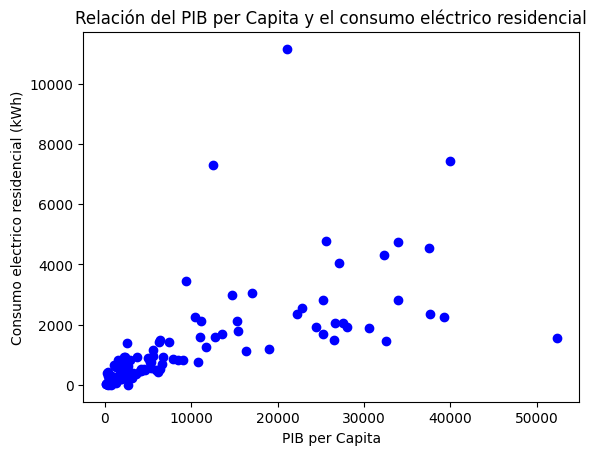

In [433]:
# Datos de ejemplo
x1, y1 = df_banco_unificado['incomeperperson'].to_numpy(), df_banco_unificado['relectricperperson'].to_numpy()

# Scatter plots
plt.scatter(x1, y1, color='blue', label='Valores de referencia (y_test)')
plt.xlabel('PIB per Capita')
plt.ylabel('Consumo electrico residencial (kWh)')
plt.title("Relación del PIB per Capita y el consumo eléctrico residencial")
plt.show()

###**Incomeperperson vs Lifeexpectancy**



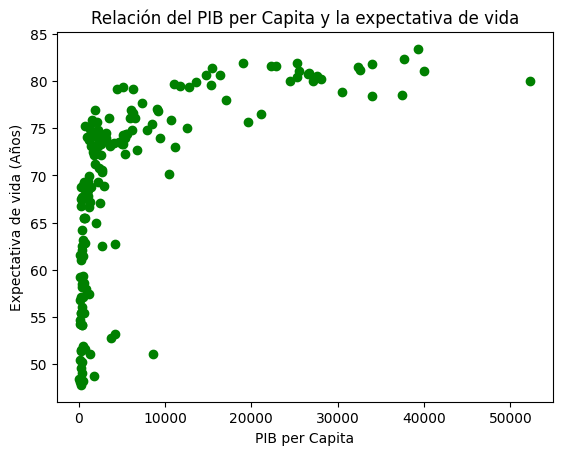

In [434]:
# Datos de ejemplo
x1, y1 = df_banco_unificado['incomeperperson'].to_numpy(), df_banco_unificado['lifeexpectancy'].to_numpy()

# Scatter plots
plt.scatter(x1, y1, color='green', label='Valores de referencia (y_test)')
plt.xlabel('PIB per Capita')
plt.ylabel('Expectativa de vida (Años)')
plt.title("Relación del PIB per Capita y la expectativa de vida")
plt.show()

###**Incomeperperson vs Urbanrate**


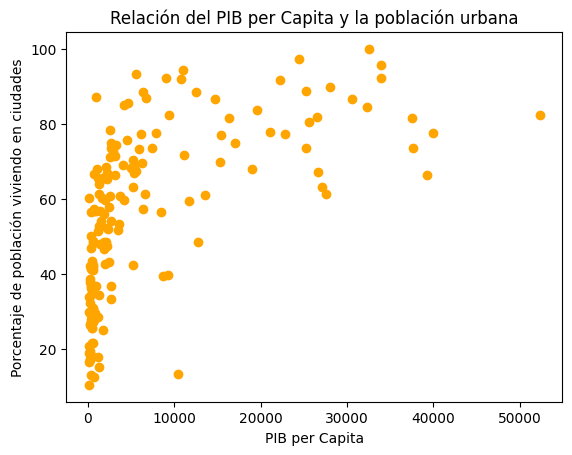

In [435]:
# Datos de ejemplo
x1, y1 = df_banco_unificado['incomeperperson'].to_numpy(), df_banco_unificado['urbanrate'].to_numpy()

# Scatter plots
plt.scatter(x1, y1, color='orange', label='Valores de referencia (y_test)')
plt.xlabel('PIB per Capita')
plt.ylabel('Porcentaje de población viviendo en ciudades')
plt.title("Relación del PIB per Capita y la población urbana")
plt.show()

#**Preparación de los Datos**

##**Separación datos de entrenamiento**

In [436]:
#Creamos el dataset con las features
X=df_banco_unificado.drop(['incomeperperson'],axis=1)

In [437]:
#Creamos la variable objetivo
y=df_banco_unificado['incomeperperson']

In [438]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

##**Creación Pipeline de Preprocesamiento**

In [439]:
# Características numéricas con valores nulos
numericas_valores_nulos = ['alcconsumption','armedforcesrate', 'breastcancerper100th','co2emissions','femaleemployrate','hivrate','internetuserate','lifeexpectancy','oilperperson','polityscore','relectricperperson','suicideper100th','employrate','urbanrate']
# Características categóricas con valores nulos
categoricas_valores_nulos = ['country','main_religion_2008','income_groups','landlocked','world_4region']

# Definimos el preprocesador usando ColumnTransformer
preprocesador = ColumnTransformer(
    transformers=[
        # Imputamos los valores numéricos utilizando KNN y añadimos una columna para utilizar indicadores de ausencia en dónde haya un valor nulo. Usamos Standar scaler para procesar valores numéricos
        ('numericas', Pipeline([('imputer', KNNImputer(n_neighbors=7, add_indicator=True)),('scaler', StandardScaler())]), numericas_valores_nulos),

        # Imputamos los valores faltantes con el valor más frecuente y utilizamos One HotEncoder para procesar características categóricas
        ('categoricas', Pipeline([
            ('imputer', SimpleImputer(strategy='constant',fill_value='DESCONOCIDO')),('onehot', OneHotEncoder(handle_unknown='ignore'))]), categoricas_valores_nulos)
    ],
    remainder='passthrough'  # Para las características que no se han especificado, simplemente se dejan sin cambios
)


##**Modelo sin aplicar regularización**

In [440]:
#Aplicamos preprocesamiento a las caracteristicas de entrenamiento
X_train_transformada=preprocesador.fit_transform(X_train)
#Creamos el modelo
modelo=LinearRegression()
#Entrenamos el modelo
modelo.fit(X_train_transformada, y_train)
# Obtenemos los coeficientes del modelo
coeficientes_sinreg = modelo.coef_
#Transformamos X_test
X_test_transformada=preprocesador.transform(X_test)
#Realizamos la predicción
y_pred_1=modelo.predict(X_test_transformada)

In [441]:
#Metricas de desempeño
mae=mean_absolute_error(y_test,y_pred_1)
mse=mean_squared_error(y_test,y_pred_1)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred_1)

print(f"El error absoluto medio (MAE) es igual a: {mae}\n\
El error cuadrático medio (MSE) es igual a: {mse}\n\
La raíz del error cuadrático medio (RMSE) es igual a: {rmse}\n\
El valor de R^2 es igual a: {r2} ")

El error absoluto medio (MAE) es igual a: 3345.8286000623834
El error cuadrático medio (MSE) es igual a: 26566797.818537638
La raíz del error cuadrático medio (RMSE) es igual a: 5154.298964799931
El valor de R^2 es igual a: 0.7566991933401259 


##**Modelo utilizando regularización tipo Lasso**

In [442]:
# Creando un pipeline con preprocesador y modelo
pipeline = Pipeline([
    ('preprocesador', preprocesador),
    ('lasso', Lasso(max_iter=100000))
])

# Definiendo el rango para alpha
param_grid = {'lasso__alpha': [0.01, 0.1, 1, 10,100]}

# Usando GridSearch para encontrar el mejor alpha
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obteniendo el mejor modelo después de GridSearch
best_ridge_model = grid_search.best_estimator_.named_steps['lasso']

# Coeficientes del mejor modelo
coeficientes_lasso = best_ridge_model.coef_

# Mejor hiperparámetro alpha
best_alpha = grid_search.best_params_['lasso__alpha']

# Prediciendo con el mejor modelo
#X_test_transformada = preprocesador.transform(X_test)
y_pred_2 = grid_search.predict(X_test)


In [443]:
#Metricas de desempeño
mae=mean_absolute_error(y_test,y_pred_2)
mse=mean_squared_error(y_test,y_pred_2)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred_2)

print(f"El error absoluto medio (MAE) es igual a: {mae}\n\
El error cuadrático medio (MSE) es igual a: {mse}\n\
La raíz del error cuadrático medio (RMSE) es igual a: {rmse}\n\
El valor de R^2 es igual a: {r2} ")

print(f"El valor óptimo de alpha es:{best_alpha}")

El error absoluto medio (MAE) es igual a: 2869.2321562502884
El error cuadrático medio (MSE) es igual a: 21935320.20307694
La raíz del error cuadrático medio (RMSE) es igual a: 4683.515795113425
El valor de R^2 es igual a: 0.799114626602559 
El valor óptimo de alpha es:0.1


##**Modelo utilizando regularización tipo Ridge**

In [444]:
# Creando un pipeline con preprocesador y modelo
pipeline = Pipeline([
    ('preprocesador', preprocesador),
    ('ridge', Ridge())
])

# Definiendo el rango para alpha
param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10]}

# Usando GridSearch para encontrar el mejor alpha
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)


# Obteniendo el mejor modelo después de GridSearch
best_ridge_model = grid_search.best_estimator_.named_steps['ridge']

# Coeficientes del mejor modelo
coeficientes_ridge = best_ridge_model.coef_

# Mejor hiperparámetro alpha
best_alpha = grid_search.best_params_['ridge__alpha']

# Prediciendo con el mejor modelo
#X_test_transformada = preprocesador.transform(X_test)
y_pred_3 = grid_search.predict(X_test)


In [445]:
#Metricas de desempeño
mae=mean_absolute_error(y_test,y_pred_3)
mse=mean_squared_error(y_test,y_pred_3)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred_3)

print(f"El error absoluto medio (MAE) es igual a: {mae}\n\
El error cuadrático medio (MSE) es igual a: {mse}\n\
La raíz del error cuadrático medio (RMSE) es igual a: {rmse}\n\
El valor de R^2 es igual a: {r2} ")

print(f"El valor óptimo de alpha es:{best_alpha}")

El error absoluto medio (MAE) es igual a: 2972.131174595572
El error cuadrático medio (MSE) es igual a: 19876137.369375207
La raíz del error cuadrático medio (RMSE) es igual a: 4458.266184221755
El valor de R^2 es igual a: 0.8179727836119903 
El valor óptimo de alpha es:10


#**Visualización de los resultados de los modelos**

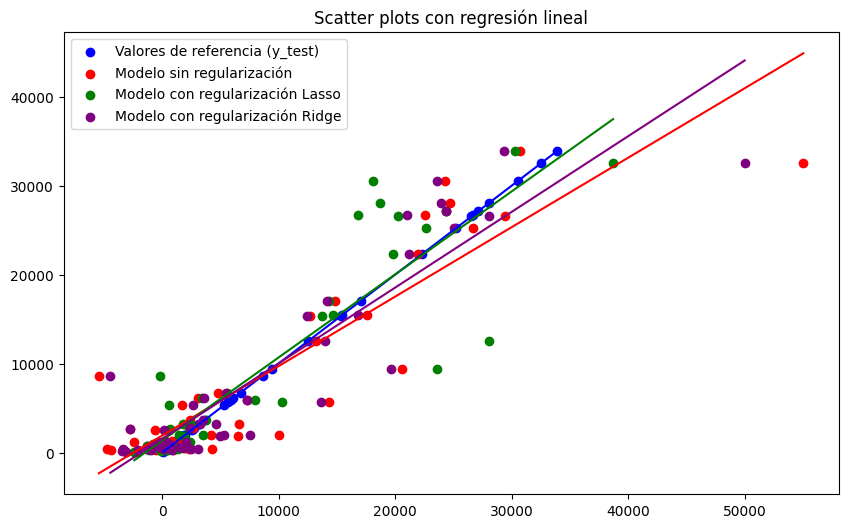

In [446]:


# Datos de ejemplo
x1, y1 = y_test.to_numpy(), y_test.to_numpy()
x2, y2 = y_pred_1, y_test.to_numpy()
x3, y3 = y_pred_2, y_test.to_numpy()
x4, y4 = y_pred_3, y_test.to_numpy()

# Función para calcular y graficar la regresión lineal
def plot_regression(x, y, color):
    coeffs = np.polyfit(x, y, 1)
    x_vals = np.linspace(min(x), max(x), 100)
    y_vals = coeffs[0] * x_vals + coeffs[1]
    plt.plot(x_vals, y_vals, color=color)

plt.figure(figsize=(10, 6))

# Scatter plots
plt.scatter(x1, y1, color='blue', label='Valores de referencia (y_test)')
plt.scatter(x2, y2, color='red', label='Modelo sin regularización')
plt.scatter(x3, y3, color='green', label='Modelo con regularización Lasso')
plt.scatter(x4, y4, color='purple', label='Modelo con regularización Ridge')

# Líneas de regresión
plot_regression(x1, y1, 'blue')
plot_regression(x2, y2, 'red')
plot_regression(x3, y3, 'green')
plot_regression(x4, y4, 'purple')

plt.legend()
plt.title("Scatter plots con regresión lineal")
plt.show()


#**Análisis de pesos de los coeficientes**

In [447]:
#Obtenemos todas las características del preprocesador
features_modelo = preprocesador.get_feature_names_out()

##**Análisis de pesos modelo sin regularización**

In [448]:
categoricas=categoricas_valores_nulos.copy()


In [449]:
categoricas.remove('country')

In [450]:
df_sinreg_coef = pd.DataFrame({
    'Feature': features_modelo,
    'Coefficient': coeficientes_sinreg
})

In [470]:
# Filtrar el DataFrame

df_filtrado_sinreg = df_sinreg_coef[df_sinreg_coef['Feature'].str.contains('|'.join(numericas_valores_nulos))]
df_filtrado_sinreg = df_filtrado_sinreg[~df_filtrado_sinreg['Feature'].str.contains('missingindicator')]
df_filtrado_sinreg=df_filtrado_sinreg.sort_values('Coefficient',ascending=False)
# Ver el DataFrame filtrado


print(df_filtrado_sinreg)


                            Feature  Coefficient
7         numericas__lifeexpectancy  2815.979463
2   numericas__breastcancerper100th  2542.797852
6        numericas__internetuserate  2221.187952
8           numericas__oilperperson  1745.817085
13             numericas__urbanrate  1648.587075
3           numericas__co2emissions  1025.331176
10    numericas__relectricperperson   984.090310
5                numericas__hivrate   717.432111
12            numericas__employrate   658.411628
11       numericas__suicideper100th   333.879760
4       numericas__femaleemployrate   269.620716
9            numericas__polityscore   250.555599
1        numericas__armedforcesrate  -521.970868
0         numericas__alcconsumption -1588.272647


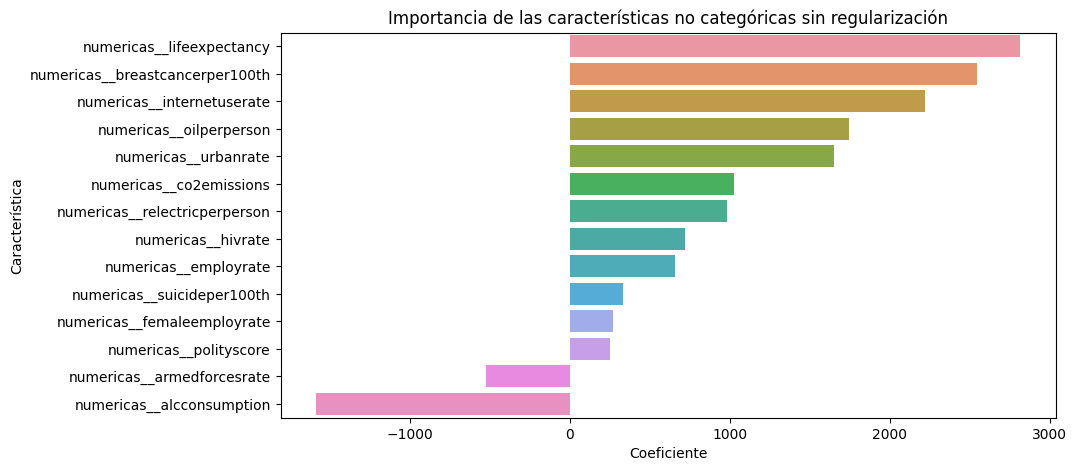

In [471]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_filtrado_sinreg,x='Coefficient',y='Feature')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.title('Importancia de las características no categóricas sin regularización')
plt.show()

In [474]:
# Filtrar el DataFrame

df_filtrado_sinreg_categorica = df_sinreg_coef[df_sinreg_coef['Feature'].str.contains('|'.join(categoricas))]
df_filtrado_sinreg_categorica=df_filtrado_sinreg_categorica.sort_values('Coefficient',ascending=False)

# Ver el DataFrame filtrado


print(df_filtrado_sinreg_categorica)


                                               Feature  Coefficient
147                  categoricas__world_4region_africa  2980.981534
141             categoricas__income_groups_high_income  1855.334626
139  categoricas__main_religion_2008_eastern_religions  1666.658385
146                 categoricas__landlocked_landlocked  1318.362619
142              categoricas__income_groups_low_income   723.009578
138          categoricas__main_religion_2008_christian  -114.843086
149                    categoricas__world_4region_asia  -120.081032
140             categoricas__main_religion_2008_muslim  -304.139839
150                  categoricas__world_4region_europe  -522.278200
143     categoricas__income_groups_lower_middle_income  -736.534953
137        categoricas__main_religion_2008_DESCONOCIDO -1247.675460
145                  categoricas__landlocked_coastline -1318.362619
144     categoricas__income_groups_upper_middle_income -1841.809250
148                categoricas__world_4region_am

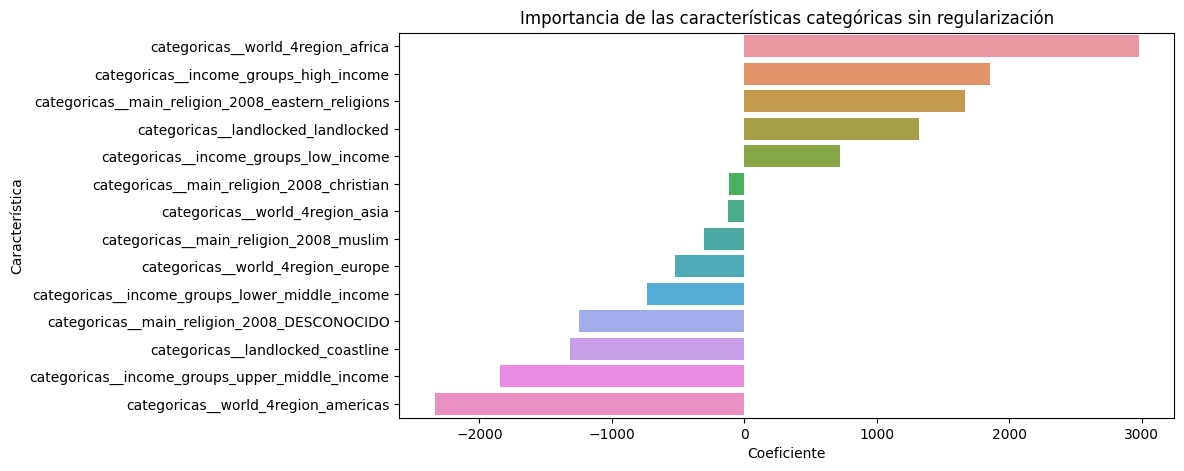

In [475]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_filtrado_sinreg_categorica,x='Coefficient',y='Feature')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.title('Importancia de las características categóricas sin regularización')
plt.show()

##**Análisis de pesos modelo con regularización tipo Lasso**

In [455]:
df_lasso_coef = pd.DataFrame({
    'Feature': features_modelo,
    'Coefficient': coeficientes_lasso
})

In [476]:
# Filtrar el DataFrame
df_filtrado_lasso = df_lasso_coef[df_lasso_coef['Feature'].str.contains('|'.join(numericas_valores_nulos))]
df_filtrado_lasso = df_filtrado_lasso[~df_filtrado_lasso['Feature'].str.contains('missingindicator')]
df_filtrado_lasso=df_filtrado_lasso.sort_values('Coefficient',ascending=False)

# Ver el DataFrame filtrado
print(df_filtrado_lasso)

                            Feature  Coefficient
10    numericas__relectricperperson  4170.516366
2   numericas__breastcancerper100th  1706.139968
8           numericas__oilperperson  1239.891039
7         numericas__lifeexpectancy   981.713699
3           numericas__co2emissions   744.299666
5                numericas__hivrate   564.154821
12            numericas__employrate   489.030085
6        numericas__internetuserate   313.870636
13             numericas__urbanrate   241.993100
11       numericas__suicideper100th   -14.049814
4       numericas__femaleemployrate   -15.419861
9            numericas__polityscore   -39.518123
1        numericas__armedforcesrate   -54.662519
0         numericas__alcconsumption  -255.000607


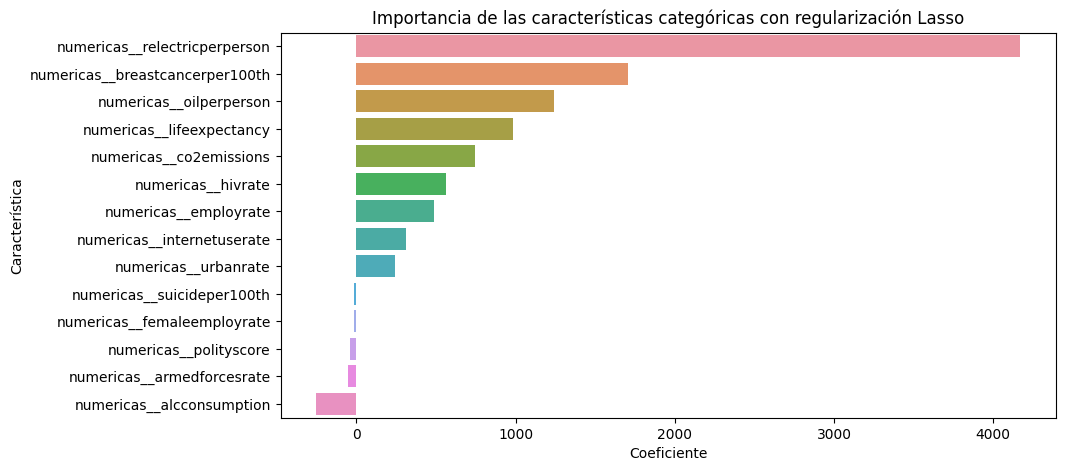

In [477]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_filtrado_lasso,x='Coefficient',y='Feature')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.title('Importancia de las características categóricas con regularización Lasso')
plt.show()

In [478]:
# Filtrar el DataFrame

df_filtrado_lasso_categorica = df_lasso_coef[df_lasso_coef['Feature'].str.contains('|'.join(categoricas))]
df_filtrado_lasso_categorica=df_filtrado_lasso_categorica.sort_values('Coefficient',ascending=False)

# Ver el DataFrame filtrado


print(df_filtrado_lasso_categorica)

                                               Feature   Coefficient
141             categoricas__income_groups_high_income  4.374460e+03
147                  categoricas__world_4region_africa  6.387259e+02
146                 categoricas__landlocked_landlocked  8.293223e-11
137        categoricas__main_religion_2008_DESCONOCIDO  0.000000e+00
138          categoricas__main_religion_2008_christian -0.000000e+00
139  categoricas__main_religion_2008_eastern_religions -0.000000e+00
140             categoricas__main_religion_2008_muslim  0.000000e+00
142              categoricas__income_groups_low_income -0.000000e+00
144     categoricas__income_groups_upper_middle_income  0.000000e+00
148                categoricas__world_4region_americas  0.000000e+00
149                    categoricas__world_4region_asia -0.000000e+00
145                  categoricas__landlocked_coastline -5.365965e+01
143     categoricas__income_groups_lower_middle_income -3.949396e+02
150                  categoricas__

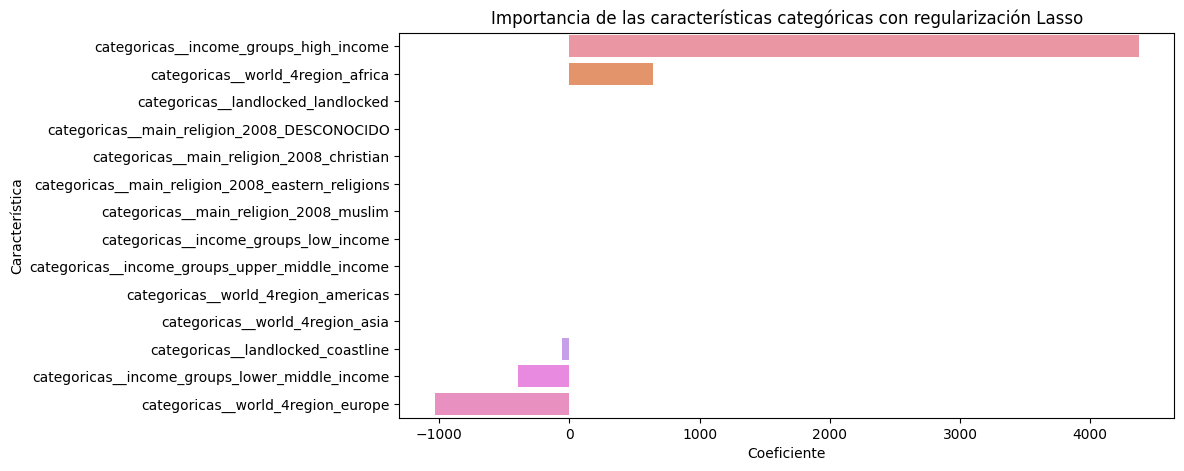

In [479]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_filtrado_lasso_categorica,x='Coefficient',y='Feature')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.title('Importancia de las características categóricas con regularización Lasso')
plt.show()

##**Análisis de pesos modelo con regularización tipo Ridge**

In [460]:
df_ridge_coef = pd.DataFrame({
    'Feature': features_modelo,
    'Coefficient': coeficientes_ridge
})

In [480]:
# Filtrar el DataFrame
df_filtrado_ridge = df_ridge_coef[df_ridge_coef['Feature'].str.contains('|'.join(numericas_valores_nulos))]
df_filtrado_ridge = df_filtrado_ridge[~df_filtrado_ridge['Feature'].str.contains('missingindicator')]
df_filtrado_ridge=df_filtrado_ridge.sort_values('Coefficient',ascending=False)

# Ver el DataFrame filtrado
print(df_filtrado_ridge)

                            Feature  Coefficient
2   numericas__breastcancerper100th  2457.709623
6        numericas__internetuserate  2297.226439
7         numericas__lifeexpectancy  1756.540463
8           numericas__oilperperson  1624.254362
10    numericas__relectricperperson  1291.691136
13             numericas__urbanrate  1284.569785
3           numericas__co2emissions   968.719051
5                numericas__hivrate   668.755878
12            numericas__employrate   500.521479
4       numericas__femaleemployrate   429.041938
11       numericas__suicideper100th   249.051279
9            numericas__polityscore   220.969219
1        numericas__armedforcesrate  -467.767773
0         numericas__alcconsumption -1279.463180


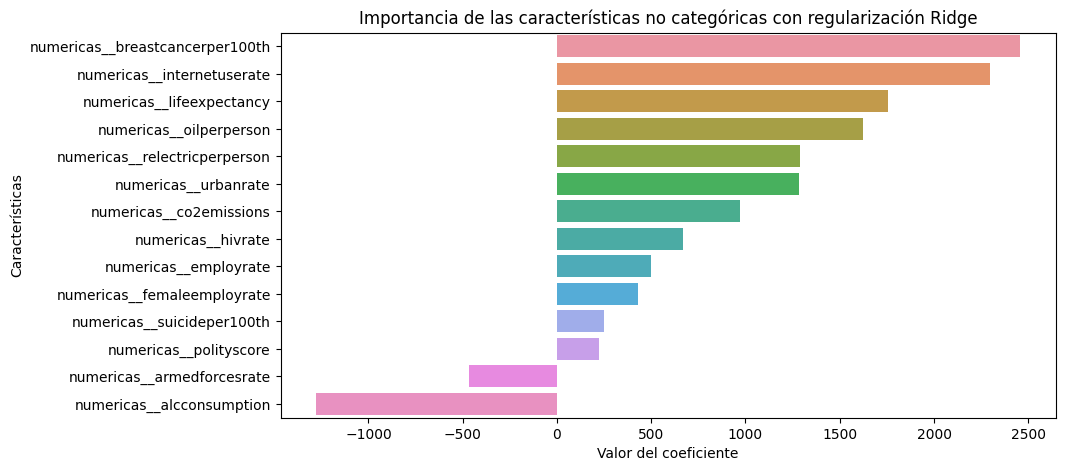

In [481]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_filtrado_ridge,x='Coefficient',y='Feature')
plt.xlabel('Valor del coeficiente')
plt.ylabel('Características')
plt.title('Importancia de las características no categóricas con regularización Ridge')
plt.show()

In [482]:
# Filtrar el DataFrame

df_filtrado_ridge_categorica = df_ridge_coef[df_ridge_coef['Feature'].str.contains('|'.join(categoricas))]
df_filtrado_ridge_categorica=df_filtrado_ridge_categorica.sort_values('Coefficient',ascending=False)

# Ver el DataFrame filtrado


print(df_filtrado_ridge_categorica)

                                               Feature  Coefficient
141             categoricas__income_groups_high_income  1627.331641
147                  categoricas__world_4region_africa  1165.568144
146                 categoricas__landlocked_landlocked   823.140136
139  categoricas__main_religion_2008_eastern_religions   741.731810
142              categoricas__income_groups_low_income   317.848223
150                  categoricas__world_4region_europe    77.580872
140             categoricas__main_religion_2008_muslim     2.423804
149                    categoricas__world_4region_asia   -25.805704
138          categoricas__main_religion_2008_christian  -318.721818
137        categoricas__main_religion_2008_DESCONOCIDO  -425.433795
143     categoricas__income_groups_lower_middle_income  -562.263430
145                  categoricas__landlocked_coastline  -823.140136
148                categoricas__world_4region_americas -1217.343312
144     categoricas__income_groups_upper_middle_

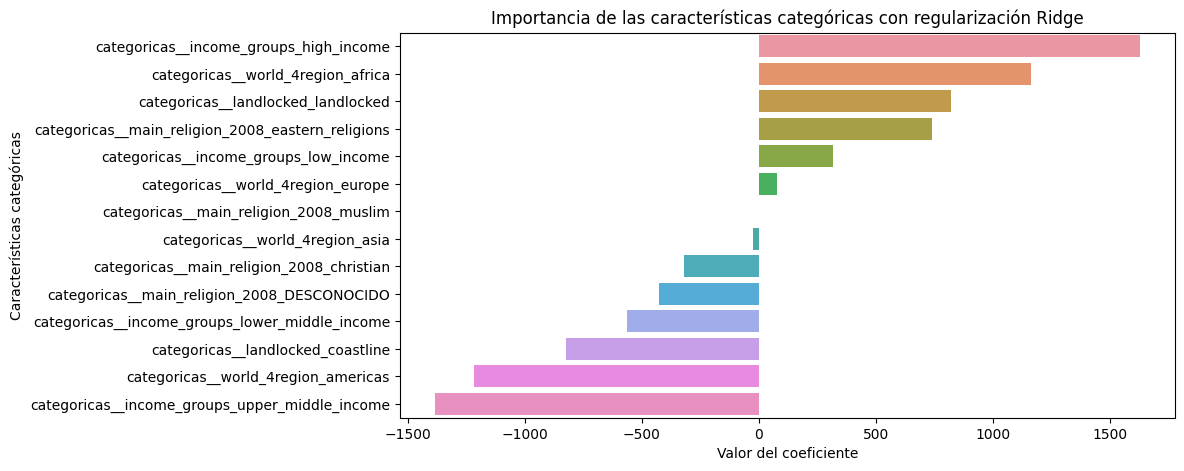

In [483]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_filtrado_ridge_categorica,x='Coefficient',y='Feature')
plt.xlabel('Valor del coeficiente')
plt.ylabel('Características categóricas')
plt.title('Importancia de las características categóricas con regularización Ridge')
plt.show()